In [ ]:
!git clone https://github.com/ahmedkhalf/Circle-Evolution.git

Cloning into 'Circle-Evolution'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 328 (delta 16), reused 12 (delta 5), pack-reused 297
Receiving objects: 100% (328/328), 483.54 KiB | 7.93 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [ ]:
pip install circle-evolution

In [ ]:
from circle_evolution import evolution
from circle_evolution import helpers
import numpy as np
import cv2


In [ ]:
%cd /content/sample_data/Picture

/content/sample_data/Picture


In [ ]:
%ls

'Mona Lisa 64.jpg'


GEN 1, FIT 0.84975744
GEN 3, FIT 0.84992927
GEN 4, FIT 0.84996591
GEN 10, FIT 0.84999891
GEN 11, FIT 0.85002207
GEN 16, FIT 0.85012285
GEN 17, FIT 0.85137665
GEN 18, FIT 0.85417800
GEN 19, FIT 0.85417849
GEN 21, FIT 0.85426905
GEN 23, FIT 0.85427492
GEN 27, FIT 0.85432407
GEN 28, FIT 0.85432444
GEN 30, FIT 0.85432589
GEN 31, FIT 0.85444915
GEN 32, FIT 0.85445406
GEN 34, FIT 0.85469532
GEN 36, FIT 0.85610571
GEN 48, FIT 0.85638559
GEN 50, FIT 0.85640304
GEN 55, FIT 0.85658264
GEN 60, FIT 0.85671027
GEN 63, FIT 0.85671044
GEN 69, FIT 0.85671702
GEN 70, FIT 0.85678051
GEN 73, FIT 0.85678197
GEN 74, FIT 0.85729278
GEN 79, FIT 0.86007627
GEN 81, FIT 0.86007677
GEN 86, FIT 0.86007683
GEN 88, FIT 0.86032545
GEN 91, FIT 0.86071861
GEN 92, FIT 0.86094407
GEN 94, FIT 0.86142829
GEN 96, FIT 0.86144454
GEN 99, FIT 0.86149893
GEN 100, FIT 0.86186143
GEN 102, FIT 0.86196404
GEN 104, FIT 0.86257352
GEN 106, FIT 0.86272106
GEN 110, FIT 0.86272106
GEN 117, FIT 0.86289883
GEN 118, FIT 0.86289887
GEN 119

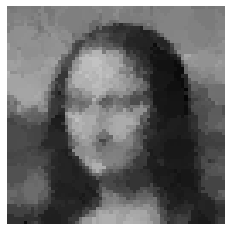

True

In [ ]:

target = helpers.load_target_image("Mona Lisa 64.jpg", size=(64, 64))
e = evolution.Evolution((64, 64), target, genes=256)

e.evolve(max_generation=50000)

helpers.show_image(e.specie.phenotype)

np.savetxt("Checkpoint.txt", e.specie.genotype)
cv2.imwrite("OuputImage.jpg", e.specie.phenotype)

In [ ]:
!pip install django

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 9.2 MB/s eta 0:00:00


In [ ]:
# models.py
from django.db import models

class Data(models.Model):
    column1 = models.CharField(max_length=100)
    column2 = models.CharField(max_length=100)
    column3 = models.CharField(max_length=100)

# views.py
from django.shortcuts import render
from .models import Data

def dashboard(request):
    # Populate the Data model with fictitious data
    data = [
        Data(column1="Row 1 Column 1", column2="Row 1 Column 2", column3="Row 1 Column 3"),
        Data(column1="Row 2 Column 1", column2="Row 2 Column 2", column3="Row 2 Column 3"),
        Data(column1="Row 3 Column 1", column2="Row 3 Column 2", column3="Row 3 Column 3"),
    ]
    for dat in data:
        dat.save()
        
    # Retrieve the data from the Data model
    data = Data.objects.all()
    return render(request, 'dashboard.html', {'data': data})

# dashboard.html
<table>
  <tr>
    <th>Column 1</th>
    <th>Column 2</th>
    <th>Column 3</th>
  </tr>
  {% for row in data %}
  <tr>
    <td>{{ row.column1 }}</td>
    <td>{{ row.column2 }}</td>
    <td>{{ row.column3 }}</td>
  </tr>
  {% endfor %}
</table>


SyntaxError: ignored

In [ ]:
import pandas as pd
from django.db import models
from django.conf import settings

settings.configure()

class Data(models.Model):
    column1 = models.CharField(max_length=100)
    column2 = models.CharField(max_length=100)
    column3 = models.CharField(max_length=100)

# Populate the Data model with fictitious data
data = [
    Data(column1="Row 1 Column 1", column2="Row 1 Column 2", column3="Row 1 Column 3"),
    Data(column1="Row 2 Column 1", column2="Row 2 Column 2", column3="Row 2 Column 3"),
    Data(column1="Row 3 Column 1", column2="Row 3 Column 2", column3="Row 3 Column 3"),
]
for dat in data:
    dat.save()

# Retrieve the data from the Data model and store it in a pandas DataFrame
data = Data.objects.values('column1', 'column2', 'column3')
df = pd.DataFrame.from_records(data)

# Print the DataFrame
print(df)


AppRegistryNotReady: ignored

In [ ]:
import requests

# Replace <API_KEY> and <STATION_ID> with your own API key and station ID
api_key = '4ea9d920042e4e9e949bad7ed238bf6fb8188cc399a74f8cbb17ac9226c0e907'
station_id = 'KMOCOLUM288'

# Make a request to the API and get the response
response = requests.get(f'http://api.wunderground.com/api/{api_key}/conditions/q/{station_id}.json')

# Check if the response was successful
if response.status_code == 200:
    # Extract the relevant data from the response
    data = response.json()['current_observation']
    temperature = data['temp_f']
    humidity = data['relative_humidity']
    wind_speed = data['wind_mph']
    wind_direction = data['wind_dir']
    pressure = data['pressure_mb']
    dewpoint = data['dewpoint_f']
    
    # Print the data
    print(f'Temperature: {temperature} F')
    print(f'Humidity: {humidity}')
    print(f'Wind Speed: {wind_speed} mph')
    print(f'Wind Direction: {wind_direction}')
    print(f'Pressure: {pressure} mb')
    print(f'Dew Point: {dewpoint} F')
else:
    # If the response was not successful, print the status code
    print(f'Request failed with status code {response.status_code}')


Request failed with status code 503


In [ ]:
import requests

# Replace <API_KEY> and <CITY> with your own API key and city name
api_key = '5216ae97235c334c1499bb33170d0500'
city = 'Missouri, US'

# Make a request to the API and get the response
response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}')

# Check if the response was successful
if response.status_code == 200:
    # Extract the relevant data from the response
    data = response.json()
    temperature = data['main']['temp'] - 273.15 # Convert from Kelvin to Celsius
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    wind_direction = data['wind']['deg']
    pressure = data['main']['pressure']
    
    # Print the data
    print(f'Temperature: {temperature:.2f} °C') # Round to 2 decimal places and add units
    print(f'Humidity: {humidity}')
    print(f'Wind Speed: {wind_speed} m/s')
    print(f'Wind Direction: {wind_direction} degrees')
    print(f'Pressure: {pressure} hPa')
else:
    # If the response was not successful, print the status code
    print(f'Request failed with status code {response.status_code}')


Temperature: 6.96 °C
Humidity: 61
Wind Speed: 2.06 m/s
Wind Direction: 120 degrees
Pressure: 1012 hPa


In [ ]:
import csv

# Open the CSV file
with open('data.csv', newline='') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')

    # Loop through each row in the CSV file
    for row in reader:
        # Extract the data from the row
        temperature = float(row[0])
        humidity = int(row[1])
        wind_speed = float(row[2])
        wind_direction = int(row[3])
        pressure = float(row[4]) * 100  # Convert hPa to Pa

        # Print the data
        print(f'Temperature: {temperature:.2f} °C') # Round to 2 decimal places and add units
        print(f'Humidity: {humidity}')
        print(f'Wind Speed: {wind_speed} m/s')
        print(f'Wind Direction: {wind_direction} degrees')
        print(f'Pressure: {pressure} Pa')


ValueError: ignored

In [ ]:
import csv
import requests

# Replace <API_KEY> and <CITY> with your own API key and city name
api_key = '5216ae97235c334c1499bb33170d0500'
city = 'Columbia, US'

# Read the data from the CSV file
with open('weather_data.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    row = next(reader)
    latitude = row['latitude']
    longitude = row['longitude']

# Make a request to the API and get the response
response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}')

# Check if the response was successful
if response.status_code == 200:
    # Extract the relevant data from the response
    data = response.json()
    temperature = data['main']['temp'] - 273.15 # Convert from Kelvin to Celsius
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    wind_direction = data['wind']['deg']
    pressure = data['main']['pressure'] * 100 # Convert from hPa to Pa
    
    # Print the data
    print(f'Temperature: {temperature:.2f} °C') # Round to 2 decimal places and add units
    print(f'Humidity: {humidity}')
    print(f'Wind Speed: {wind_speed} m/s')
    print(f'Wind Direction: {wind_direction} degrees')
    print(f'Pressure: {pressure} Pa')
else:
    # If the response was not successful, print the status code
    print(f'Request failed with status code {response.status_code}')


Temperature: 6.15 °C
Humidity: 55
Wind Speed: 3.6 m/s
Wind Direction: 140 degrees
Pressure: 101100 Pa


In [ ]:
import csv
import requests

# Replace <API_KEY> and <CITY> with your own API key and city name
api_key = '5216ae97235c334c1499bb33170d0500'
city = 'Missouri, US'

# Read the header row from the CSV file
with open('weather_data.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    header_row = next(reader)

# Make a request to the API and get the response
response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}')

# Check if the response was successful
if response.status_code == 200:
    # Extract the relevant data from the response
    data = response.json()
    temperature = data['main']['temp'] - 273.15 # Convert from Kelvin to Celsius
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    wind_direction = data['wind']['deg']
    pressure = data['main']['pressure']
    
    # Print the data
    print(f'{header_row[0]}: {city}')
    print(f'{header_row[1]}: {latitude}')
    print(f'{header_row[2]}: {longitude}')
    print(f'{header_row[3]}: {temperature:.2f} °C') # Round to 2 decimal places and add units
    print(f'{header_row[4]}: {humidity}')
    print(f'{header_row[5]}: {wind_speed} m/s')
    print(f'{header_row[6]}: {wind_direction} degrees')
    print(f'{header_row[7]}: {pressure} hPa')
else:
    # If the response was not successful, print the status code
    print(f'Request failed with status code {response.status_code}')


﻿timestamp: Missouri, US
latitude: 38.94
longitude: -92.32
Temperature (degC): 7.21 °C
Humidity (%): 61
Wind Speed (m/s): 2.06 m/s
Wind Direction (deg): 120 degrees
Pressure (Pa): 1012 hPa


In [1]:
import csv
import requests
from datetime import datetime

# Replace <API_KEY> and <CITY> with your own API key and city name
api_key = '5216ae97235c334c1499bb33170d0500'
city = 'Missouri, US'

# Open the CSV file in append mode and write the header row if it's a new file
with open('weather_data.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    if csvfile.tell() == 0:
        writer.writerow(['timestamp', 'latitude', 'longitude', 'Temperature (degC)', 'Humidity (%)', 'Wind Speed (m/s)', 'Wind Direction (deg)', 'Pressure (Pa)', 'Rainfall (in)', 'Solar Radiation (W/m2)'])

    # Make a request to the API and get the response
    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}')

    # Check if the response was successful
    if response.status_code == 200:
        # Extract the relevant data from the response
        data = response.json()
        temperature = data['main']['temp'] - 273.15 # Convert from Kelvin to Celsius
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        wind_direction = data['wind']['deg']
        pressure = data['main']['pressure'] * 100 # Convert from hPa to Pa
        
        # Format the timestamp
        timestamp = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')

        # Write the data to the CSV file
        writer.writerow([timestamp, '38.94', '-92.32', f'{temperature:.2f}', humidity, wind_speed, wind_direction, pressure, '', ''])
        
        # Print a message to indicate success
        print('Data written to CSV file.')
    else:
        # If the response was not successful, print the status code
        print(f'Request failed with status code {response.status_code}')


Data written to CSV file.
